In [1]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 119.8/119.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gpy
%matplotlib inline

In [68]:
df=pd.read_csv("test.csv")

In [69]:
df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [70]:
df['date']=pd.to_datetime(df['pickup_datetime'])  # converting into datetime format

In [71]:
# created a year column
df['year'] = df['date'].dt.year 

In [72]:
# created a month column
df['Month'] = df['date'].dt.month 

In [73]:
# created a Day column
df['Day'] = df['date'].dt.day

In [74]:
# created a day of week column
df['Week']=df['date'].dt.dayofweek

# mapping the day of week with name
week_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['week_name'] = df['date'].dt.dayofweek.map(week_names)

In [75]:
# creating a time column table 
df['Time']=df['date'].dt.strftime('%I:%M %p')

In [76]:
# creating a time column for 24 hour format time
df['Time_24_format']=df['date'].dt.time

In [77]:
df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,year,Month,Day,Week,week_name,Time,Time_24_format
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24+00:00,2015,1,27,1,Tuesday,01:08 PM,13:08:24
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24+00:00,2015,1,27,1,Tuesday,01:08 PM,13:08:24
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44+00:00,2011,10,8,5,Saturday,11:53 AM,11:53:44
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12+00:00,2012,12,1,5,Saturday,09:12 PM,21:12:12
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12+00:00,2012,12,1,5,Saturday,09:12 PM,21:12:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2015-05-10 12:37:51+00:00,2015,5,10,6,Sunday,12:37 PM,12:37:51
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,2015-01-12 17:05:51+00:00,2015,1,12,0,Monday,05:05 PM,17:05:51
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,2015-04-19 20:44:15+00:00,2015,4,19,6,Sunday,08:44 PM,20:44:15
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,2015-01-31 01:05:19+00:00,2015,1,31,5,Saturday,01:05 AM,01:05:19


In [78]:
# Droppinng the unnecessary column form the given data set.
df.drop(columns=["pickup_datetime",'date','key'],inplace=True)


In [79]:
df.head(10)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Day,Week,week_name,Time,Time_24_format
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,Tuesday,01:08 PM,13:08:24
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,Tuesday,01:08 PM,13:08:24
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,Saturday,11:53 AM,11:53:44
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,Saturday,09:12 PM,21:12:12
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,Saturday,09:12 PM,21:12:12
5,-73.960983,40.765547,-73.979177,40.740053,1,2012,12,1,5,Saturday,09:12 PM,21:12:12
6,-73.949013,40.773204,-73.959622,40.770893,1,2011,10,6,3,Thursday,12:10 PM,12:10:20
7,-73.777282,40.646636,-73.985083,40.759368,1,2011,10,6,3,Thursday,12:10 PM,12:10:20
8,-74.014099,40.709638,-73.995106,40.741365,1,2011,10,6,3,Thursday,12:10 PM,12:10:20
9,-73.969582,40.765519,-73.980686,40.770725,1,2014,2,18,1,Tuesday,03:22 PM,15:22:20


In [82]:
from geopy.geocoders import Nominatim

# create a geolocator object
geolocator = Nominatim(user_agent='ad')

# define the latitude and longitude coordinates
latitude = df['pickup_latitude']
longitude = df['pickup_longitude']

# find the city name using the geolocator object
location = geolocator.reverse(f"{latitude}, {longitude}")
df['pickup_city'] = location.raw['address']['city']

df['pickup_city']

ValueError: Must be a coordinate pair or Point

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

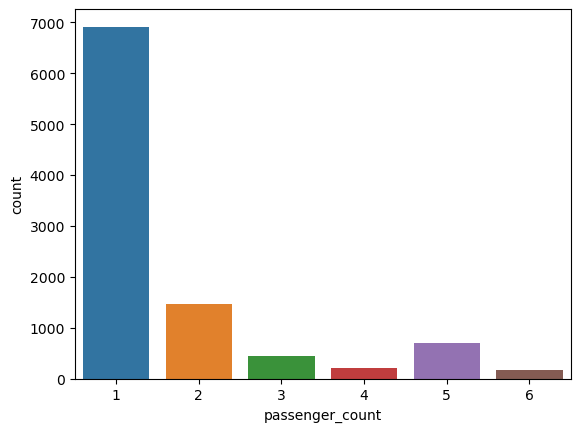

In [14]:
sns.countplot(df['passenger_count'])